# Randomized Search

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC

from sklearn import metrics

In [2]:
## load dataset
dataobj = load_breast_cancer()

X = pd.DataFrame(dataobj.data, columns=dataobj.feature_names)
y = dataobj.target

df = X
df['target'] = y

df.head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,0
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,0
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,0
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,0


In [3]:
## spliting data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7, random_state=1, stratify=y)
print(f'X_train.shape = {X_train.shape}')
print(f'X_test.shape = {X_test.shape}')

X_train.shape = (398, 31)
X_test.shape = (171, 31)


In [4]:
## making pipline
scl = StandardScaler()
pca = PCA(n_components=.9)
clf = SVC(random_state=1)

pipe = Pipeline([
    ('scale', scl),
    ('PCA', pca),
    ('clf', clf)
])

pipe

Pipeline(steps=[('scale', StandardScaler()), ('PCA', PCA(n_components=0.9)),
                ('clf', SVC(random_state=1))])

In [5]:
pipe.get_params()

{'memory': None,
 'steps': [('scale', StandardScaler()),
  ('PCA', PCA(n_components=0.9)),
  ('clf', SVC(random_state=1))],
 'verbose': False,
 'scale': StandardScaler(),
 'PCA': PCA(n_components=0.9),
 'clf': SVC(random_state=1),
 'scale__copy': True,
 'scale__with_mean': True,
 'scale__with_std': True,
 'PCA__copy': True,
 'PCA__iterated_power': 'auto',
 'PCA__n_components': 0.9,
 'PCA__n_oversamples': 10,
 'PCA__power_iteration_normalizer': 'auto',
 'PCA__random_state': None,
 'PCA__svd_solver': 'auto',
 'PCA__tol': 0.0,
 'PCA__whiten': False,
 'clf__C': 1.0,
 'clf__break_ties': False,
 'clf__cache_size': 200,
 'clf__class_weight': None,
 'clf__coef0': 0.0,
 'clf__decision_function_shape': 'ovr',
 'clf__degree': 3,
 'clf__gamma': 'scale',
 'clf__kernel': 'rbf',
 'clf__max_iter': -1,
 'clf__probability': False,
 'clf__random_state': 1,
 'clf__shrinking': True,
 'clf__tol': 0.001,
 'clf__verbose': False}

In [6]:
## creating hyper parameter range
param_range = [.0001, .001, .01, .1, 1, 10, 100, 1000]

set1 = {
    'clf__C':param_range,
    'clf__gamma':param_range,
    'clf__kernel':['linear']
}

set2 = {
    'clf__C':param_range,
    'clf__gamma':param_range,
    'clf__kernel':['rbf']
}

param_grid = [set1, set2]

In [24]:
## Grid Search cross validation
from sklearn.model_selection import RandomizedSearchCV
gs = RandomizedSearchCV(
    estimator=pipe,
    param_distributions=param_grid,
    cv=10,
    scoring='accuracy',
    n_jobs=-1,
    n_iter=100
)
gs

RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('scale', StandardScaler()),
                                             ('PCA', PCA(n_components=0.9)),
                                             ('clf', SVC(random_state=1))]),
                   n_iter=100, n_jobs=-1,
                   param_distributions=[{'clf__C': [0.0001, 0.001, 0.01, 0.1, 1,
                                                    10, 100, 1000],
                                         'clf__gamma': [0.0001, 0.001, 0.01,
                                                        0.1, 1, 10, 100, 1000],
                                         'clf__kernel': ['linear']},
                                        {'clf__C': [0.0001, 0.001, 0.01, 0.1, 1,
                                                    10, 100, 1000],
                                         'clf__gamma': [0.0001, 0.001, 0.01,
                                                        0.1, 1, 10, 100, 1000],
                                         'clf__kernel': ['rbf']}],
                   scoring='accuracy')

In [25]:
## fitting model
gs.fit(X_train, y_train)

RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('scale', StandardScaler()),
                                             ('PCA', PCA(n_components=0.9)),
                                             ('clf', SVC(random_state=1))]),
                   n_iter=100, n_jobs=-1,
                   param_distributions=[{'clf__C': [0.0001, 0.001, 0.01, 0.1, 1,
                                                    10, 100, 1000],
                                         'clf__gamma': [0.0001, 0.001, 0.01,
                                                        0.1, 1, 10, 100, 1000],
                                         'clf__kernel': ['linear']},
                                        {'clf__C': [0.0001, 0.001, 0.01, 0.1, 1,
                                                    10, 100, 1000],
                                         'clf__gamma': [0.0001, 0.001, 0.01,
                                                        0.1, 1, 10, 100, 1000],
                                         'clf__kernel': ['rbf']}],
                   scoring='accuracy')

In [26]:
## result from grid search
re = pd.DataFrame(gs.cv_results_)
re.sort_values(by = ['rank_test_score', 'mean_test_score']).head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__kernel,param_clf__gamma,param_clf__C,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
8,0.003327,0.001566,0.000946,0.000487,rbf,0.0001,1000,"{'clf__kernel': 'rbf', 'clf__gamma': 0.0001, '...",0.975,1.0,...,1.0,1.0,1.000,0.975,1.0,1.0,1.0,0.9950,0.010000,1
17,0.003850,0.002130,0.001147,0.000766,rbf,0.001,100,"{'clf__kernel': 'rbf', 'clf__gamma': 0.001, 'c...",0.975,1.0,...,1.0,1.0,1.000,0.975,1.0,1.0,1.0,0.9950,0.010000,1
38,0.004272,0.002504,0.000953,0.000526,linear,0.1,1,"{'clf__kernel': 'linear', 'clf__gamma': 0.1, '...",0.975,1.0,...,1.0,1.0,1.000,0.975,1.0,1.0,1.0,0.9950,0.010000,1
58,0.003582,0.001684,0.001268,0.000822,linear,0.0001,1,"{'clf__kernel': 'linear', 'clf__gamma': 0.0001...",0.975,1.0,...,1.0,1.0,1.000,0.975,1.0,1.0,1.0,0.9950,0.010000,1
62,0.003169,0.001470,0.000937,0.000684,linear,1,1,"{'clf__kernel': 'linear', 'clf__gamma': 1, 'cl...",0.975,1.0,...,1.0,1.0,1.000,0.975,1.0,1.0,1.0,0.9950,0.010000,1
69,0.004033,0.002084,0.001062,0.000850,linear,1000,1,"{'clf__kernel': 'linear', 'clf__gamma': 1000, ...",0.975,1.0,...,1.0,1.0,1.000,0.975,1.0,1.0,1.0,0.9950,0.010000,1
74,0.003094,0.001548,0.000709,0.000387,linear,0.001,1,"{'clf__kernel': 'linear', 'clf__gamma': 0.001,...",0.975,1.0,...,1.0,1.0,1.000,0.975,1.0,1.0,1.0,0.9950,0.010000,1
84,0.002923,0.001552,0.000991,0.001064,linear,10,1,"{'clf__kernel': 'linear', 'clf__gamma': 10, 'c...",0.975,1.0,...,1.0,1.0,1.000,0.975,1.0,1.0,1.0,0.9950,0.010000,1
1,0.004053,0.001369,0.000899,0.000097,linear,10,0.1,"{'clf__kernel': 'linear', 'clf__gamma': 10, 'c...",0.975,1.0,...,1.0,1.0,0.975,0.975,1.0,1.0,1.0,0.9925,0.011456,9
2,0.004750,0.002081,0.000970,0.000465,linear,1000,10,"{'clf__kernel': 'linear', 'clf__gamma': 1000, ...",0.975,1.0,...,1.0,1.0,1.000,0.950,1.0,1.0,1.0,0.9925,0.016008,9


In [27]:
## get best score and hyper parameter
print(gs.best_score_)
print(gs.best_params_)

0.9949999999999999
{'clf__kernel': 'rbf', 'clf__gamma': 0.0001, 'clf__C': 1000}


In [28]:
## refitting with best parameters
gs.refit

True

In [29]:
## Evaluate with testing data
y_pred = gs.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        64
           1       0.97      1.00      0.99       107

    accuracy                           0.98       171
   macro avg       0.99      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



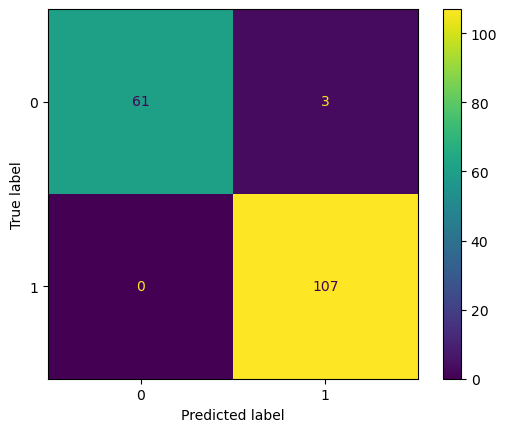

In [30]:
## confusion metrix
cm = metrics.confusion_matrix(y_test, y_pred)
fig = metrics.ConfusionMatrixDisplay(cm)
fig.plot()